In [1]:
'''
1. 시각적으로 표현할 분석 소주제 5개 이상 선정
2. 전처리(결측/이상/중복) 모두 처리 진행
    - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인
3. 주제별 시각화 그래프 2개 이상
----------------------------------------------------------
4. 주제별 분석내용 작성 : 개인별로 작성
5. 제출 : 분석내용 + 가공데이터파일 + ipynb 파일
    - 제출 형식 : 모두 압축해서 :본인이름.zip
    - 제출 위치 : 구글드라이브 > 3_산출물 > 1_심평원분석
6. 문제해결 : 조별로 스터디 하면서 해결
'''

'\n1. 시각적으로 표현할 분석 소주제 5개 이상 선정\n2. 전처리(결측/이상/중복) 모두 처리 진행\n    - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인\n3. 주제별 시각화 그래프 2개 이상\n----------------------------------------------------------\n4. 주제별 분석내용 작성 : 개인별로 작성\n5. 제출 : 분석내용 + 가공데이터파일 + ipynb 파일\n    - 제출 형식 : 모두 압축해서 :본인이름.zip\n    - 제출 위치 : 구글드라이브 > 3_산출물 > 1_심평원분석\n6. 문제해결 : 조별로 스터디 하면서 해결\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- 항코드를 이용하여 그룹별로 금액산정하여 시각화(비교)

In [3]:
df = pd.read_excel('C:/STUDY/Web/6day_심평원_데이터분석/files_new/df_30TABLE_kor_진료내역.xlsx')
df

,명세서 연결코드,항코드,목코드,분류유형코드,분류코드,1_2구분코드,단가,1회투약량,1일투약량,1일투여량실시횟수,총투여일수또는실시횟수,총사용량또는실시횟수,금액,가산적용금액,줄번호,일반명코드
0,1,01,2,1,AA254,1,9430,1.0,1.0,1.0,1,1.0,9430,9430,1,$
1,2,09,1,1,C3710,2,900,1.0,1.0,1.0,1,1.0,900,900,1,$
2,3,01,2,1,AA222,1,3310,1.0,1.0,1.0,1,1.0,3310,3310,1,$
3,4,10,1,8,K2062001,1,310,1.0,1.0,1.0,1,1.0,310,310,4,$
4,4,10,1,1,G9101,2,2960,1.0,1.0,1.0,1,1.0,2960,3404,3,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,5628,09,1,1,B2590,2,2030,1.0,1.0,1.0,1,1.0,2030,2639,16,$
24901,5628,09,1,1,C3797,2,1620,1.0,1.0,1.0,1,1.0,1620,2106,21,$
24902,5629,01,1,1,AA154600,1,13820,1.0,1.0,1.0,1,1.0,13820,13820,1,$
24903,5630,01,2,1,AA254,1,9430,1.0,1.0,1.0,1,1.0,9430,9430,1,$


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   명세서 연결코드     24905 non-null  int64  
 1   항코드          24905 non-null  object 
 2   목코드          24905 non-null  int64  
 3   분류유형코드       24905 non-null  int64  
 4   분류코드         24905 non-null  object 
 5   1_2구분코드      24905 non-null  int64  
 6   단가           24905 non-null  int64  
 7   1회투약량        24905 non-null  float64
 8   1일투약량        24905 non-null  float64
 9   1일투여량실시횟수    24905 non-null  float64
 10  총투여일수또는실시횟수  24905 non-null  int64  
 11  총사용량또는실시횟수   24905 non-null  float64
 12  금액           24905 non-null  int64  
 13  가산적용금액       24905 non-null  int64  
 14  줄번호          24905 non-null  int64  
 15  일반명코드        24905 non-null  object 
dtypes: float64(4), int64(9), object(3)
memory usage: 3.0+ MB


In [5]:
df.describe()

,명세서 연결코드,목코드,분류유형코드,1_2구분코드,단가,1회투약량,1일투약량,1일투여량실시횟수,총투여일수또는실시횟수,총사용량또는실시횟수,금액,가산적용금액,줄번호
count,24905.000000,24905.000000,24905.000000,24905.000000,2.490500e+04,24905.000000,24905.000000,24905.00000,24905.000000,24905.000000,2.490500e+04,2.490500e+04,24905.000000
mean,2849.765670,2.129693,1.445613,1.441156,7.399741e+03,1.151245,1.557787,1.74385,1.917727,3.618996,1.066358e+04,1.154760e+04,14.920096
std,1643.060032,8.002492,1.110079,0.496535,3.034351e+04,5.444529,11.867595,13.13220,3.951381,28.351040,5.546960e+04,5.751674e+04,34.342813
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.00400,0.000000,0.005000,0.000000e+00,0.000000e+00,1.000000
25%,1377.000000,1.000000,1.000000,1.000000,7.700000e+02,1.000000,1.000000,1.00000,1.000000,1.000000,9.800000e+02,1.127000e+03,2.000000
50%,2853.000000,1.000000,1.000000,1.000000,1.710000e+03,1.000000,1.000000,1.00000,1.000000,1.000000,2.760000e+03,3.012000e+03,4.000000
75%,4334.000000,2.000000,1.000000,2.000000,9.430000e+03,1.000000,1.000000,1.00000,1.000000,1.000000,9.430000e+03,9.568000e+03,10.000000
max,5631.000000,99.000000,8.000000,2.000000,1.978840e+06,600.000000,960.000000,960.00000,60.000000,2592.000000,3.957680e+06,3.957680e+06,324.000000


In [6]:
df[df.duplicated()]

,명세서 연결코드,항코드,목코드,분류유형코드,분류코드,1_2구분코드,단가,1회투약량,1일투약량,1일투여량실시횟수,총투여일수또는실시횟수,총사용량또는실시횟수,금액,가산적용금액,줄번호,일반명코드


In [7]:
df_group = df.copy()

In [8]:
condition = [(df_group['항코드'] == '01'),(df_group['항코드'] == '02'),(df_group['항코드'] == '03'),
            (df_group['항코드'] == '04'),(df_group['항코드'] == '05'),(df_group['항코드'] == '06'),
            (df_group['항코드'] == '07'),(df_group['항코드'] == '08'),(df_group['항코드'] == '09'),
            (df_group['항코드'] == '10'),(df_group['항코드'] == 'LL'),(df_group['항코드'] == 'SS'),(df_group['항코드'] == 'T'),
            (df_group['항코드'] == 'VV'),(df_group['항코드'] == 'WW'),(df_group['항코드'] == 'X'),(df_group['항코드'] == 'U')]

code = ['진찰료','입원료','투약료','주사료','마취료','이학요법료','정신요법료','처치 및 수술료','검사료','영상진단및방사선치료료',
       '요양병원정액','특수장비','특수재료','보훈 등 100 본인부담','비급여','정신과정액','알수없음']

df_group['코드명'] = np.select(condition, code)
df_group.head()

,명세서 연결코드,항코드,목코드,분류유형코드,분류코드,1_2구분코드,단가,1회투약량,1일투약량,1일투여량실시횟수,총투여일수또는실시횟수,총사용량또는실시횟수,금액,가산적용금액,줄번호,일반명코드,코드명
0,1,01,2,1,AA254,1,9430,1.0,1.0,1.0,1,1.0,9430,9430,1,$,진찰료
1,2,09,1,1,C3710,2,900,1.0,1.0,1.0,1,1.0,900,900,1,$,검사료
2,3,01,2,1,AA222,1,3310,1.0,1.0,1.0,1,1.0,3310,3310,1,$,진찰료
3,4,10,1,8,K2062001,1,310,1.0,1.0,1.0,1,1.0,310,310,4,$,영상진단및방사선치료료
4,4,10,1,1,G9101,2,2960,1.0,1.0,1.0,1,1.0,2960,3404,3,$,영상진단및방사선치료료


In [9]:
df_gr = df_group.groupby('코드명').sum()
df_gr['금액']

코드명
검사료              28916386
마취료               6305661
보훈 등 100 본인부담       47075
비급여                 46760
알수없음                62069
영상진단및방사선치료료       9584802
요양병원정액            3027140
이학요법료             8071053
입원료              36908989
정신과정액               60940
정신요법료             5032740
주사료              27819821
진찰료              62326380
처치 및 수술료         56690091
투약료               8531733
특수장비             12144815
Name: 금액, dtype: int64

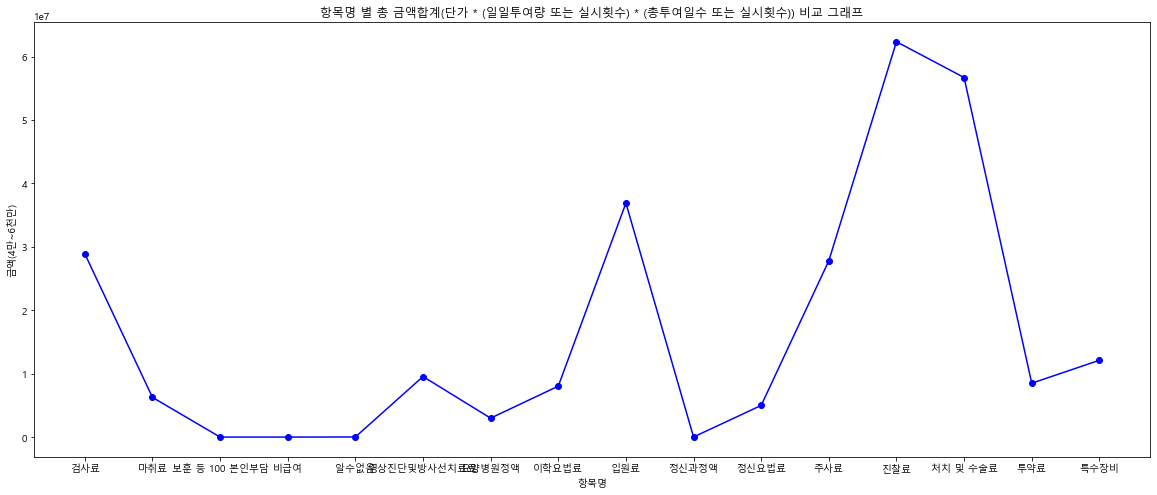

In [10]:
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.figure(figsize=(20,8))
plt.plot(df_gr.index, df_gr['금액'],'bo-')
plt.xlabel('항목명')
plt.ylabel('금액(4만~6천만)')
plt.title('항목명 별 총 금액합계(단가 * (일일투여량 또는 실시횟수) * (총투여일수 또는 실시횟수)) 비교 그래프')
plt.show()

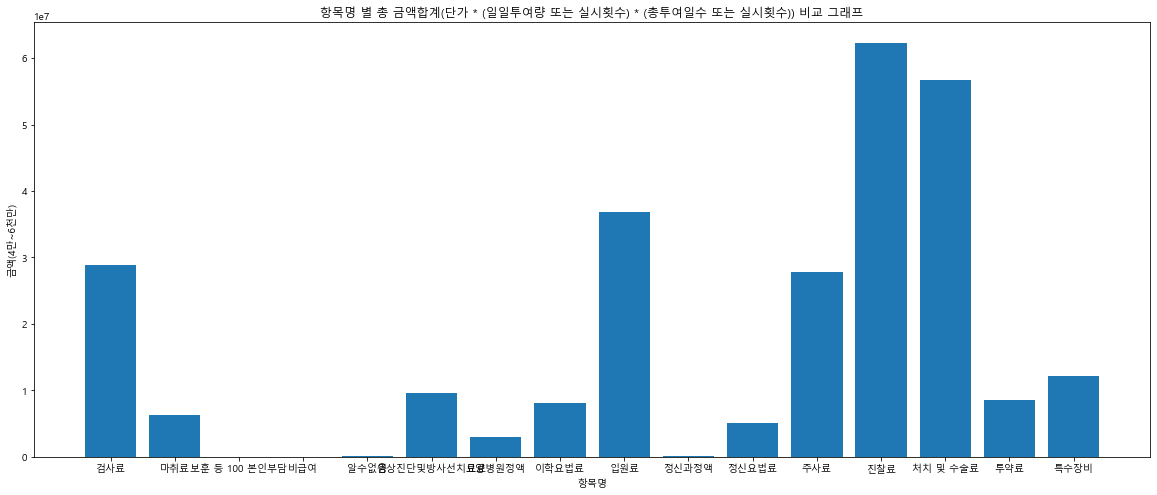

In [11]:
plt.rc('font', family = 'Malgun Gothic', size = 10)
plt.figure(figsize=(20,8))
plt.bar(df_gr.index, df_gr['금액'])
plt.xlabel('항목명')
plt.ylabel('금액(4만~6천만)')
plt.title('항목명 별 총 금액합계(단가 * (일일투여량 또는 실시횟수) * (총투여일수 또는 실시횟수)) 비교 그래프')

plt.show()

In [13]:
df_gr.to_excel('C:/Users/admin/Desktop/성혜경/성혜경/항목명_금액합계.xlsx', index = False)

- 진료과목코드를 이용하여 성별에 따른 의료 진료 통계내어 시각화 

In [15]:
df2 = pd.read_excel('C:/STUDY/Web/6day_심평원_데이터분석/files_new/df_20TABLE_kor_명세서일반내역.xlsx')

In [16]:
df_sex = df2.copy()

In [17]:
df_sex = df_sex.fillna(0)

In [18]:
df_sex['성별'] = ['남자' if i == 1 else '여자' for i in df_sex['성별구분코드']]
df_sex.head()

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,성별
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,9430,2800,6630,0,$,$,$,$,30796,남자
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,4380,500,3880,0,$,$,$,$,9795,여자
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,3310,1300,2010,0,$,$,$,$,34835,남자
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,26660,7900,18760,0,$,$,$,$,35538,남자
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,9430,2800,6630,0,$,$,$,$,4665,남자


In [19]:
df_sex['진료과목코드'] = df_sex['진료과목코드'].astype(str)


df_sex['진료과목코드'].str.zfill(2)

df_sex['진료과목코드'] =  df_sex['진료과목코드'].str.zfill(2)
df_sex_1 = df_sex[['성별구분코드','성별','진료과목코드']]
print(df_sex_1)
df_sex_1['성별'].value_counts()

      성별구분코드  성별 진료과목코드
0          1  남자     01
1          2  여자     00
2          1  남자     03
3          1  남자     54
4          1  남자     01
...      ...  ..    ...
5626       2  여자     56
5627       1  남자     01
5628       1  남자     11
5629       2  여자     05
5630       1  남자     13

[5631 rows x 3 columns]


남자    2864
여자    2767
Name: 성별, dtype: int64

In [20]:
df_CODE = pd.read_excel('C:/STUDY/Web/6day_심평원_데이터분석/files_org/표본자료 변수 테이블(2012-2013).xlsx', sheet_name=5, usecols="B,C", skiprows=2 )

df_CODE = df_CODE.loc[:47]

df_CODE.columns=['진료과목코드','과이름']


In [21]:
df_CODE['진료과목코드'] = df_CODE['진료과목코드'].astype(str)

df_sex_merge = pd.merge(df_sex_1, df_CODE, how='left', on='진료과목코드')
df_sex_merge = df_sex_merge[['성별','과이름','성별구분코드']]
df_sex_merge

,성별,과이름,성별구분코드
0,남자,내과,1
1,여자,일반의,2
2,남자,정신과,1
3,남자,치주과,1
4,남자,내과,1
...,...,...,...
5626,여자,구강내과,2
5627,남자,내과,1
5628,남자,소아청소년과,1
5629,여자,정형외과,2


In [22]:
df_pv = df_sex_merge.pivot_table(index = '과이름',
                         columns = '성별',
                         values = '성별구분코드',
                        aggfunc = 'count')
df_pv.fillna(0)

성별,남자,여자
과이름,,
가정의학과,121.0,120.0
구강내과,0.0,1.0
구강악안면외과,43.0,21.0
내과,986.0,822.0
마취통증의학과,18.0,136.0
비뇨기과,54.0,41.0
산부인과,4.0,104.0
성형외과,10.0,7.0
소아청소년과,235.0,233.0


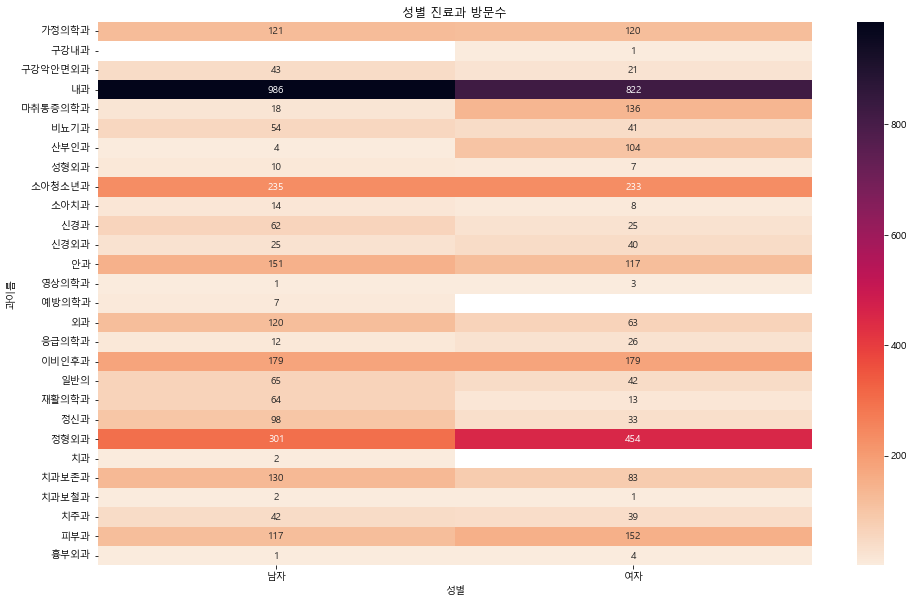

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(df_pv, annot = True, fmt='.0f', cmap='rocket_r')
plt.title('성별 진료과 방문수')
plt.show()

<AxesSubplot:title={'center':'성별 진료과 방문수'}, xlabel='과이름'>

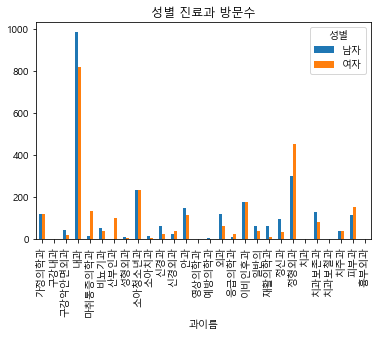

In [24]:
df_pv.plot(kind = 'bar',title = '성별 진료과 방문수')

In [25]:
df_pv.to_excel('C:/Users/admin/Desktop/성혜경/성혜경/성별_진료과_방문수.xlsx', index = False)